# **CS-5783 Assignment 1**


---



**Question 1**


In [36]:
#importing necessary libraries
import numpy as np
import random as rand
import matplotlib.pyplot as plt
import math

In [76]:
#importing & reading the data
xtest = np.load('/content/drive/MyDrive/x_test.npy')
xtrain = np.load('/content/drive/MyDrive/x_train.npy')
ytest = np.load('/content/drive/MyDrive/y_test.npy')
ytrain = np.load('/content/drive/MyDrive/y_train.npy')

1. Visualizing the data

We plot the given training and test dataset to understand the underlying relationship between the variables.

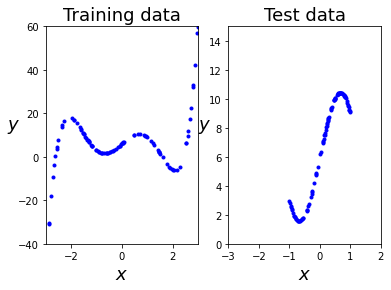

In [77]:
%matplotlib inline
plt.subplot(1, 2, 1)
plt.plot(xtrain,ytrain,'b.')
plt.title('Training data', fontsize=18)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([-3,3,-40,60])

plt.subplot(1, 2, 2)
plt.plot(xtest,ytest,'b.')
plt.title('Test data', fontsize=18)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([-3,2,0,15])
plt.show()

Theta values [6.19321416 3.30656683]


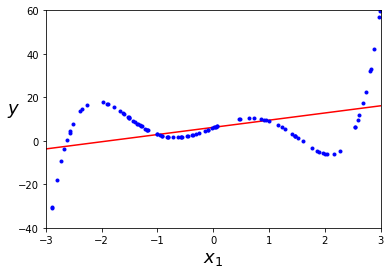

In [78]:
# Linear regression model using the "Normal Equations"

xtrain2 = np.c_[np.ones((len(xtrain),1)),xtrain]
parameters = np.linalg.inv(xtrain2.T.dot(xtrain2)).dot(xtrain2.T).dot(ytrain)
print("Theta values",parameters)

x_new = np.array([[-40],[60]])
xtrain2_new = np.c_[np.ones((2,1)),x_new]
y_predict = xtrain2_new.dot(parameters)

plt.plot(x_new,y_predict,'r-')
plt.plot(xtrain,ytrain,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3,3,-40,60])
plt.show()

In [79]:
# Linear regression model using the Gradient descent

def gradientDescent(X, Y, theta, alpha, a, itr):
    cost_history = np.zeros(itr)
    x_T = X.transpose()
    for i in range(0, itr):
        h_x = np.dot(X, theta)
        error= h_x - Y
 

        cost = np.sum(error** 2) / (2 * a)
        #print("Iteration %d | Cost: %f" % (i, cost))
        gradient = np.dot(x_T, error) / a
        theta = theta - alpha * gradient
        cost_history[i]=cost
    return theta,cost,cost_history

X = xtrain2
Y = ytrain
a, b = np.shape(X)
itr= 100
alpha = 0.05
theta = np.ones(b)
theta,cost,cost_history = gradientDescent(X,Y, theta, alpha,a, itr)
print(theta)
print(cost)

[6.1587225  3.30347151]
84.668015917418


We observe that values of theta obtained are alomst same to the ones obtained using Normal equations. We now use these values of theta in conjunction with xtest values to predict the y values for test set and plot against the actual test data to see the fit.

(-3.0, 3.0, 0.0, 15.0)

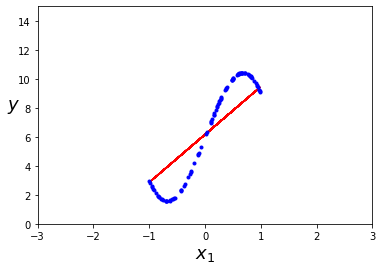

In [80]:
# Plotting the predicted values of Linear regression model using the Gradient descent
ypredict=theta[0]+theta[1]*xtest
#print(ypredict)
plt.plot(xtest,ypredict,'r-')
plt.plot(xtest,ytest,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3,3,0,15])

2. 


(a)Clearly the relationship between variables x & y is non-linear. We are   trying to fit a liner curve to this relationship, but the performance of the model in itself won't be good as the x in the data is not linearly related to y.


---


(b)We will need to do feature engineering to add non linearity to the curve and get a better fit.


---


  (i) These fetures can be engineered using the **basis function** which are the deterministic functions of the orignal parameters.

  (ii) Some of the basis functions that we can try are the Polynomial Basis function with M-3, M-4 and M-5 degree for training data.
  Since we already have a linear relationship for the regression model we choose to start with a degree 3 polynomial.

  These plots have been visualized below.

Polynomial Basis function with M-3, M-4 and M-5 degree for training data

       3          2
2.149 x + 0.3668 x - 8.866 x + 3.579


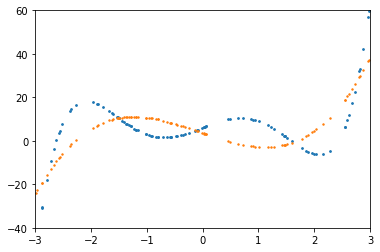

          4         3          2
-0.06737 x + 2.148 x + 0.9152 x - 8.86 x + 3.074


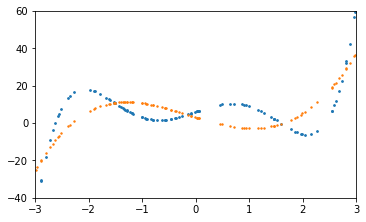

   5             4     3             2
1 x - 7.869e-16 x - 8 x - 2.113e-15 x + 10 x + 6


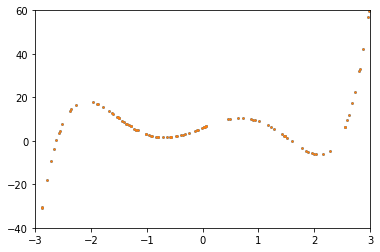

In [81]:
xtrain2 = xtrain.flatten()
ytrain2 = ytrain.flatten()
poly_model = np.poly1d(np.polyfit(xtrain2, ytrain2,3))
print(poly_model)

plt.scatter(xtrain2, ytrain2, s = 3, label = 'Data')
plt.scatter(xtrain2, poly_model(xtrain2), s = 2, label = 'Numpy Predictions')
plt.axis([-3,3,-40,60])
plt.show()


xtrain2 = xtrain.flatten()
ytrain2 = ytrain.flatten()
poly_model = np.poly1d(np.polyfit(xtrain2, ytrain2,4))
print(poly_model)

plt.scatter(xtrain2, ytrain2, s = 3, label = 'Data')
plt.scatter(xtrain2, poly_model(xtrain2), s = 2, label = 'Numpy Predictions')
plt.axis([-3,3,-40,60])
plt.tight_layout(4)
plt.show()

xtrain2 = xtrain.flatten()
ytrain2 = ytrain.flatten()
poly_model = np.poly1d(np.polyfit(xtrain2, ytrain2,5))
print(poly_model)

plt.scatter(xtrain2, ytrain2, s = 3, label = 'Data')
plt.scatter(xtrain2, poly_model(xtrain2), s = 2, label = 'Numpy Predictions')
plt.axis([-3,3,-40,60])
plt.show()

Polynomial Basis function with M-5 degree for test data - the best fitting

        3           2
-6.832 x - 0.01308 x + 9.727 x + 6.009


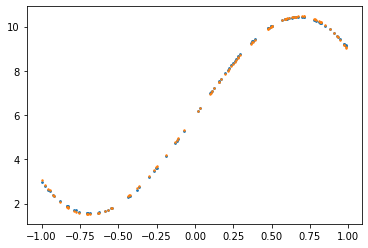

In [82]:
xtest2 = xtest.flatten()
ytest2 = ytest.flatten()
poly_model = np.poly1d(np.polyfit(xtest2, ytest2,3))
print(poly_model)

plt.scatter(xtest2, ytest2, s = 3, label = 'Data')
plt.scatter(xtest2, poly_model(xtest2), s = 2, label = 'Numpy Predictions')

Question 2

In [86]:
# Importing the dataset
import pandas as pd
df = pd.read_csv (r'/content/drive/MyDrive/Assignment1_Q2_Data.csv') 
#print (df)

x = df[['Local Price','Bathrooms','Land Area','Living area','# Garages','# Rooms',  '# Bedrooms' , 'Age of home',  'Construction type','Architecture type','# Fire places'  ]]
y = df["Price (1000$)"]

In [87]:
# Calcuting the parameters for all the fetures
X_house = np.c_[np.ones((len(x),1)),x]
theta_best = np.linalg.inv(X_house.T.dot(X_house)).dot(X_house.T).dot(y)
print(theta_best)

[ 2.54245911  0.84203461  9.13727309  0.1805502  13.31511517  1.93053047
 -1.07030169 -0.30201195 -0.07198748  1.02264378  1.33991086  2.78686263]


In [88]:
#preedicting values of y for test set and calculating MSE & RMSE (for comparision with gradient descent)
for i in theta_best:
  if i != 0:
    ypredict =theta[0] + np.dot(X_house, theta_best)
#print(ypredict)


y_actual = y
y_predicted = ypredict

MSE = np.square(np.subtract(y_actual,y_predicted)).mean() 
print("Mean Square Error:\n")
print(MSE)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Mean Square Error:

14.108134197816453
Root Mean Square Error:

3.7560796314530465


In [89]:
X = x
Y = ypredict
a, b = np.shape(X)
itr= 200
alpha = 0.001
theta = np.ones(b)
theta,cost,cost_history = gradientDescent(X,Y, theta, alpha,a, itr)

for i in theta:
  if i != 0:
    ypredict2 =theta[0] + np.dot(X_house, theta_best)

y_actual = y
y_predicted = ypredict2

MSE = np.square(np.subtract(y_actual,y_predicted)).mean() 
print("Mean Square Error:\n")
print(MSE)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Mean Square Error:

13.778926825463019
Root Mean Square Error:

3.711997686618759


We obtain almost the same RMSE values for both methods.


Question 2 - Report

---


1.   The average least squares error for the given data using your simple linear regression model is 14.108
2.   Since the coefficient for Living area (5th theta term,first being ThetaO. So 4th column of x array) is the highest, therefore, it is having the most effect on the final predicted value.
Using only this feature may give a good estimate but is still not sufficient to entirely predict the prices. Specifically when the value is less than 1 this feture alone does not suffice.
3.  Age of home factor has the least effect on the final value as it has the lowest coefficient for theta. Since it accounts for 5-8% of home prices removing it may not significantly effect the prediction of prices.







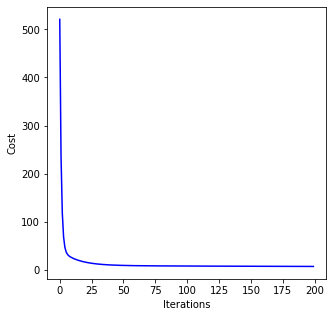

In [90]:
fig,ax = plt.subplots(figsize=(5,5))
ax.set_ylabel('Cost')
ax.set_xlabel('Iterations')
_=ax.plot(range(itr),cost_history,'b-')


Question 3

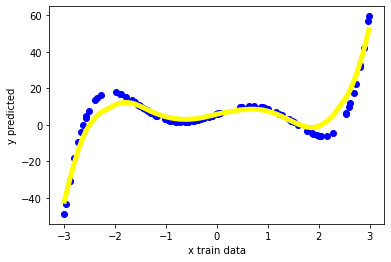

In [91]:
# Diagonal weight matrix
def weight(point, x_matrix, k):
    m,n = np.shape(x_matrix)
    weights = np.mat(np.eye((m)))
    
    for j in range(m):
        d = point - X[j]
        weights[j, j] = np.exp(d * d.T / (-2.0 * k**2))
    
    return weights

# Calculating local weight of each example
def localWeight(point, x_matrix, y_matrix, k):
    wt = weight(point, x_matrix, k)
    th = (X.T * (wt*X)).I * (X.T * wt * y_matrix.T)
    return th

# Predict y values
def ypredict(x_matrix, y_matrix, k):
    m,n = np.shape(x_matrix)
    ypred = np.zeros(m)
    
    for i in range(m):
        ypred[i] = x_matrix[i] * localWeight(x_matrix[i], x_matrix, y_matrix, k)
        
    return ypred


# Building suitable data types
m_sizeA = np.mat(xtrain)
m_sizeB = np.mat(ytrain)
m = np.shape(m_sizeB)[1]
one = np.ones((1, m), dtype = int)


X = np.hstack((one.T, m_sizeA))

ypred = ypredict(X, m_sizeB, 0.35)
# plotting the predicted values
xsort = X.copy()
xsort.sort(axis=0)
plt.scatter(xtrain, ytrain, color='blue')
plt.plot(xsort[:, 1], ypred[X[:, 1].argsort(0)], color='yellow', linewidth=5)
plt.xlabel('x train data')
plt.ylabel('y predicted')
plt.show()

*I was unable to extract the theta values and predict corresponding y values for test bed.